In [1]:
import os
import numpy as np

import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

from src.setup import setup_python, setup_pytorch
from src.dataset import RGBDObjectDataset

In [2]:
setup_python()

sys.version = 3.8.10 (default, Nov 22 2023, 10:22:35) 
[GCC 9.4.0]


In [3]:
# setup_pytorch()

- https://pytorch.org/docs/1.13/

# Visualize Data

In [4]:
dataset = RGBDObjectDataset(path="data/RGB-D_Object/rgbd-dataset",
                            mode="train",
                            modalities=["rgb", "depth", "mask", "loc"],
                            transform=None,
                            nb_imgs=100)

In [5]:
len(dataset)

100

In [6]:
print(dataset.class_dict)

{'apple': 0, 'ball': 1, 'banana': 2, 'bell_pepper': 3, 'binder': 4, 'bowl': 5, 'calculator': 6, 'camera': 7, 'cap': 8, 'cell_phone': 9, 'cereal_box': 10, 'coffee_mug': 11, 'comb': 12, 'dry_battery': 13, 'flashlight': 14, 'food_bag': 15, 'food_box': 16, 'food_can': 17, 'food_cup': 18, 'food_jar': 19, 'garlic': 20, 'glue_stick': 21, 'greens': 22, 'hand_towel': 23, 'instant_noodles': 24, 'keyboard': 25, 'kleenex': 26, 'lemon': 27, 'lightbulb': 28, 'lime': 29, 'marker': 30, 'mushroom': 31, 'notebook': 32, 'onion': 33, 'orange': 34, 'peach': 35, 'pear': 36, 'pitcher': 37, 'plate': 38, 'pliers': 39, 'potato': 40, 'rubber_eraser': 41, 'scissors': 42, 'shampoo': 43, 'soda_can': 44, 'sponge': 45, 'stapler': 46, 'tomato': 47, 'toothbrush': 48, 'toothpaste': 49, 'water_bottle': 50}


In [7]:
print(len(dataset.x))
print(dataset.x[:10])

100
['apple_1_1_81', 'apple_1_1_42', 'apple_1_2_183', 'apple_1_1_11', 'apple_1_4_119', 'apple_1_4_47', 'apple_1_1_2', 'apple_1_4_61', 'apple_1_4_54', 'apple_1_1_54']


In [8]:
print(len(dataset.y))
print(dataset.y[:10])

100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
data_loader = DataLoader(dataset,
                         batch_size=8,
                         shuffle=True)

In [10]:
# retrieve batch data
batch_rgb, batch_depth, batch_mask, batch_loc_x, batch_loc_y, batch_label = next(iter(data_loader))
print(f"Feature batch shape: {batch_rgb.size()}")
print(f"Labels batch shape: {batch_label.size()}")

Feature batch shape: torch.Size([8, 3, 480, 640])
Labels batch shape: torch.Size([8])


torch.Size([3, 480, 640])


Text(0.5, 0.98, 'Label: 0->apple | Location: (270,212)')

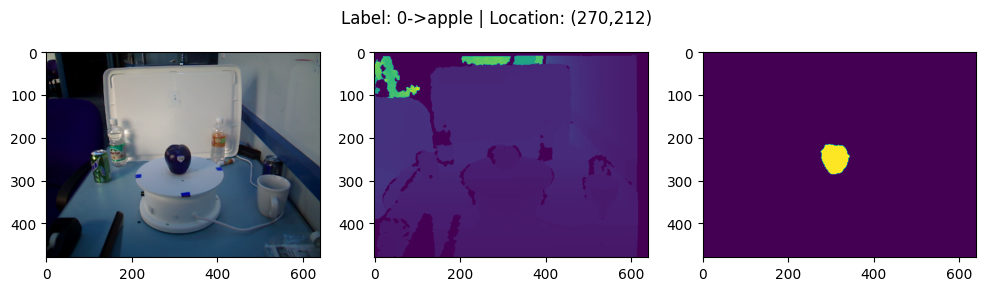

In [22]:
rgb, depth, mask, loc_x, loc_y, label = batch_rgb[0], batch_depth[0], batch_mask[0], batch_loc_x[0], batch_loc_y[0], batch_label[0]
print(rgb.size())
fig, axs = plt.subplots(1, 3, figsize=(12,3))
axs[0].imshow(rgb.permute(1, 2, 0))
axs[1].imshow(depth.permute(1, 2, 0))
axs[2].imshow(mask.permute(1, 2, 0))
fig.suptitle(f"Label: {label}->{list(dataset.class_dict)[label]} | Location: ({loc_x},{loc_y})")